# Cvičení 2: Numerický výpočet určitého integrálu a Monte Carlo

## 1. Primitivní funkce a určitý integrál

Funkci $F\!:\,\mathbb{R}\mapsto\mathbb{R}$ nazveme **primitivní funkcí** k funkci $f\!:\,\mathbb{R}\mapsto\mathbb{R}$
na otevřeném intervalu $I\subset \mathbb{R}$, pokud pro každé $x\in I$ platí
$$
F'(x) = f(x).
$$
Lze ukázat, že pokud je $f$ spojitá na otevřeném intervalu $I$, pak existuje primitivní funkce $F$ k $f$ na tomto intervalu.

Pomocí primitivní funkce zadefinujme určitý integrál funkce $f$ od $a$ do $b$, kde $a,b\in\mathbb{R}$ a $a<b$. Jsou-li funkce $f$ a $F$ spojité na uzavřeném intervalu $\left\langle a, b\right\rangle$ a je-li $F$ primitivní k $f$ na $(a,b)$, definujeme **určitý integrál funkce** $f$ od $a$ do $b$ jako
\begin{equation}
\int_a^b f(x)\,\mathrm{d}x := F(b) - F(a).
\end{equation}
Tento vztah se často nazývá **Newtonův-Leibnizův vzorec**.
Pro zjednodušení zápisu se pro rozdíl hodnot $F(b)$ a $F(a)$ zavádí toto značení:
$$
[F(x)]_a^b \stackrel{\mathrm{ozn.}}{=} F(b) - F(a).
$$

## 2. Přibližný výpočet určitého integrálu pomocí obdélníkového pravidla

Určitý integrál funkce f od a do b vypočteme přibližně pomocí **obdélníkového pravidla**. 

Rozdělme nejprve interval $\left\langle a, b\right\rangle$ na $n$ stejných dílků o délce
\begin{equation}
h=\frac{b-a}{n}.
\end{equation}
Krajní body $i$-tého dílku postupně označme $x_{i-1}$ a $x_i$; platí tedy
\begin{equation}
x_0=a < x_1 < \cdots < x_{n-1} < x_n=b.
\label{body}
\end{equation}
Vypočteme si dále středy jednotlivých dílků:
$$
c_i = \frac{x_{i-1} + x_{i}}{2},\quad i = 1,2,\ldots,n.
$$
Na $i$-tém dílku pak funkci $f$ nahradíme konstantní funkcí o hodnotě $f(c_i)$ a
hledaný integrál budeme aproximovat takto:
$$
\int_a^bf(x)\,\mathrm{d}x \approx hf(c_1) + hf(c_2) + \cdots + h f(c_n) = h\sum_{i=1}^{n}f(c_i).
$$
Například integrál funkce $f$ od $a$ do $b$ tak nahrazujeme součtem obsahů příslušných obdélníků.

<div>
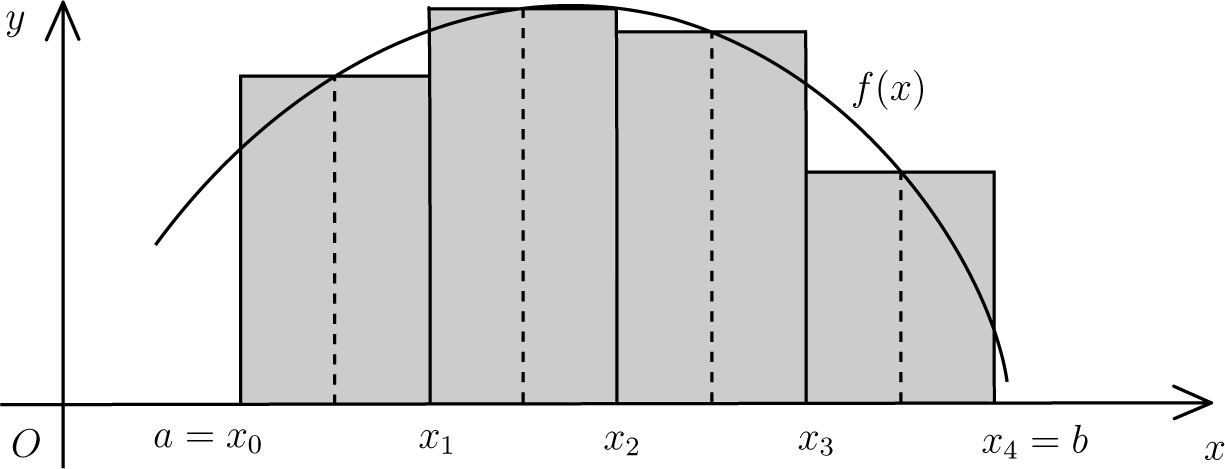
</div>

Lze ukázat, že pokud existuje spojitá $f''$ na $\left\langle a, b\right\rangle$, potom pro chybu aproximace platí
\begin{equation}
\left|\int_a^bf(x)\,\mathrm{d}x - h\sum_{i=1}^{n}f(c_i)\right| \leq \frac{(b-a)^3}{24n^2}\max\limits_{x\in\left\langle a, b\right\rangle}|f''(x)|.
\label{int:odhad_chyby}
\end{equation}



### Načtení balíčku numpy
K výpočtům budeme používat knihovnu **numpy** s aliasem **np** pro matematické funkce a práci s poli.

Následujícím kódem naimportujeme balíček. 

In [ ]:
import numpy as np

### Úkol 1: 
Pomocí obdélníkového pravidla spočtěte přibližně obsah jednotkového kruhu a výsledky porovnejte se skutečným obsahem daného kruhu. 

<div>
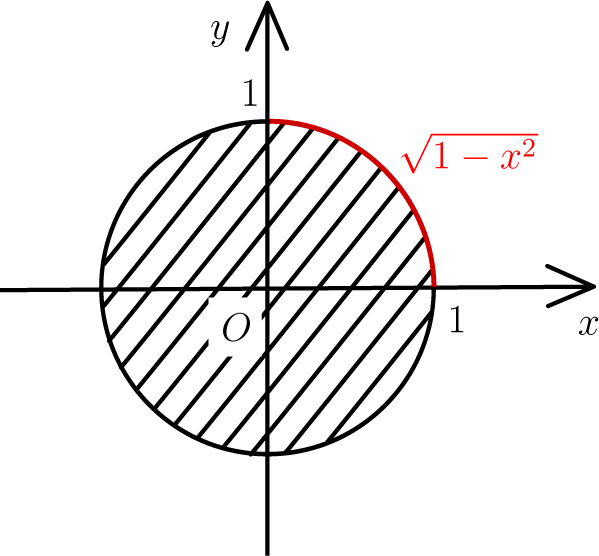
</div>

In [ ]:
def obsah_kruhu(n):
    # n ... počet dělení intervalu <0,1>

    h = 1/n # délka dílku dělení  
    x = np.linspace(0,1,n+1) 
   
    c = 0.5*(x[0:n] + x[1:n+1]) # středy jednotlivých dílků
    f = np.sqrt(1 - c**2) # funkční hodnoty ve středech dílků

    S = 4*h*np.sum(f)  # přibližný obsah jednotkového kruhu
    err = np.abs(np.pi - S) # absolutní chyba výpočtu
    
    print("Obsah jednotkového kruhu vypočtený přibližně pomocí obdélníkového pravidla pro n =", n, "je S = " + str(S) + ".\nPři tomto odhadu jsme se dopustili chyby " + str(err) + ".\n")

In [ ]:
obsah_kruhu(100)

### Úkol 2: 
Pomocí obdélníkového pravidla spočtěte přibližně obsah srdce na následujícím obrázku a výsledky porovnejte se skutečným obsahem srdce. 

<div>
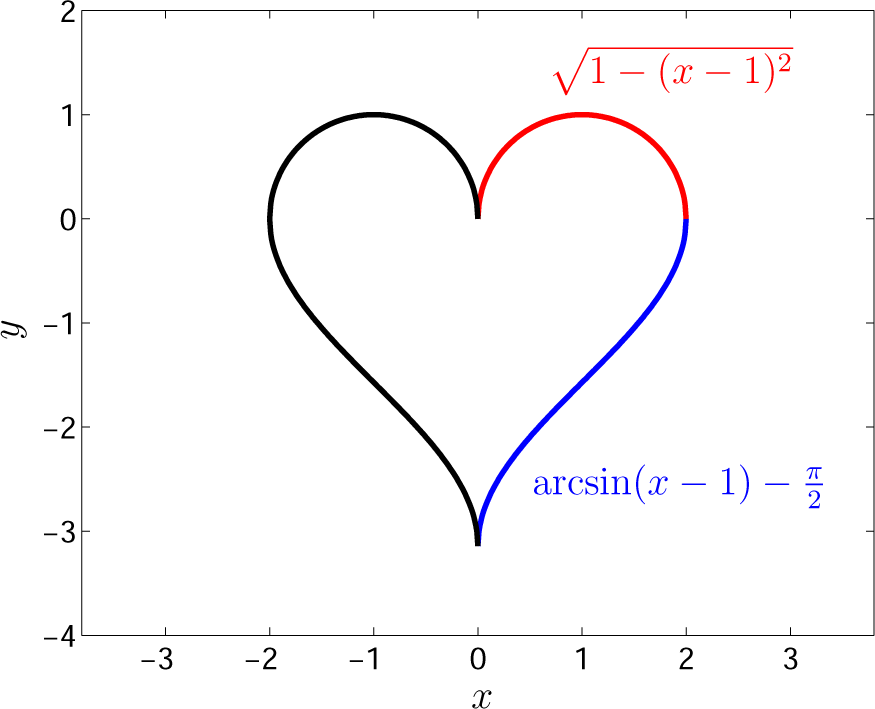
</div>

In [ ]:
def obsah_srdce(n):
    # n ... počet dělení intervalu <0,2>

    h = 2/n # délka dílku dělení        
    x = np.linspace(0,2,n+1) 

    c = 0.5*(x[0:n] + x[1:n+1]) # středy jednotlivých dílků
    f1 = np.sqrt(1 - (c-1)**2) # funkční hodnoty ve středech dílků
    S1 = h * np.sum(f1)
    
    f2 = np.arcsin(c-1) - np.pi/2 # funkční hodnoty ve středech dílků
    S2 = -h * np.sum(f2)
    
    S = 2 * (S1 + S2)  # přibližný obsah srdce
    err = np.abs(3*np.pi - S) # absolutní chyba výpočtu

    print("Obsah srdce vypočtený přibližně pomocí obdélníkového pravidla pro n =", n, "je S = " + str(S) + ".\nPři tomto odhadu jsme se dopustili chyby " + str(err) + ".\n")

In [ ]:
obsah_srdce(100)

### Úkol 3: 
Aproximujte hodnotu integrálu
$$
\int_0^1 x^2\,\mathrm{d} x
$$
pomocí obdélníkového pravidla tak, aby chyba aproximace byla nejvýše $10^{-4}$. Určete počet dílků dělení intervalu $\left\langle 0, 1\right\rangle$, který zaručí dosažení požadované přesnosti. 


In [ ]:
def int_kvadr(n):
    # n ... počet dělení intervalu <0,1>

    h = 1/n # délka dílku dělení  
    x = np.linspace(0,1,n+1)
   
    c = 0.5*(x[0:n] + x[1:n+1]) # středy jednotlivých dílků
    f = c**2 # funkční hodnoty ve středech dílků

    S = h*np.sum(f)  # přibližná hodnota integrálu
    err = np.abs(1/3 - S) # absolutní chyba výpočtu

    print("Hodnota integrálu vypočtená přibližně pomocí obdélníkového pravidla pro n =", n, "je S = " + str(S) + ".\nPři tomto odhadu jsme se dopustili chyby " + str(err) + ".\n")

    return S, err

In [ ]:
int_kvadr(100)

In [ ]:
# Nyní určíme počet dílků dělení intervalu <0,1>, který zaručí dosažení přesnosti 1e-4.

n = 1
S, err = int_kvadr(n)
while err > 1e-4:
    n += 1
    S, err = int_kvadr(n)
print(n, 'dílků dělení intervalu <0,1> zajistí přesnost ' + str(err) + '.\n')

## 3. Metoda Monte Carlo

Monte Carlo je třída výpočetních algoritmů založená na provádění náhodných experimentů. Protože metoda vyžaduje generování velkého souboru náhodných dat, je vhodné pro její implementaci použití počítače. Metod Monte Carlo se používá v případě, kdy je příliš pracné nebo nemožné nalézt přesný výsledek jiným způsobem. Její výhodou je jednoduchá implementace, nevýhodou relativně malá přesnost. Pro odhad přesnoti metody Monte Carlo platí následující tvrzení. S pravděpodobností 75 procent nemá chyba aproximace hodnotu větší než $1/\sqrt{n}$. Tzn. například pro $10^{4}$ pokusů nám s pravděpodobností 75 procent chyba nepřekročí hodnotu $0,\!01$.

My si ukážeme tři způsoby, jak pomocí Monte Carla spočítat určitý integrál. První dvě metody jsou si typově podobné a spočívají v určení poměru obsahů neznámé plochy a plochy, jejíž obsah známe.

### 3.1. Náhodné souřadnice

Nejjednodušší způsob, jak pomocí Monte Carla odhadnout určitý integrál, je pomocí náhodného generování souřadnic v rovině. Princip si můžeme ukázat na problému určení integrálu

\begin{equation}
\int\limits_{0}^{1} \sqrt{1-x^2}\,\mathrm{d}x,
\end{equation}
který odpovídá spočítání obsahu plochy vymezené grafem funkce ${\sqrt{1-x^2}}$, osou $x$ a osou $y$.

Grafem integrované funkce je na intervalu $\langle0,1\rangle$ čtvrtina kružnice. Označme písmenem $S$ plochu mezi tímto grafem, osou $x$ a osou $y$. Nejprve vepíšeme plochu $S$ do obrazce, jehož obsah známe, třeba do jednotkového čtverce. Metoda Monte Carlo funguje tak, že v jednotkovém čtverci náhodně generuje body. Pravděpodobnost, že vygenerovaný bod leží v $S$, je rovna poměru obsahu plochy $S$ k obsahu plochy jednotkového čtverce, do kterého jsme ji uzavřeli.

<div>
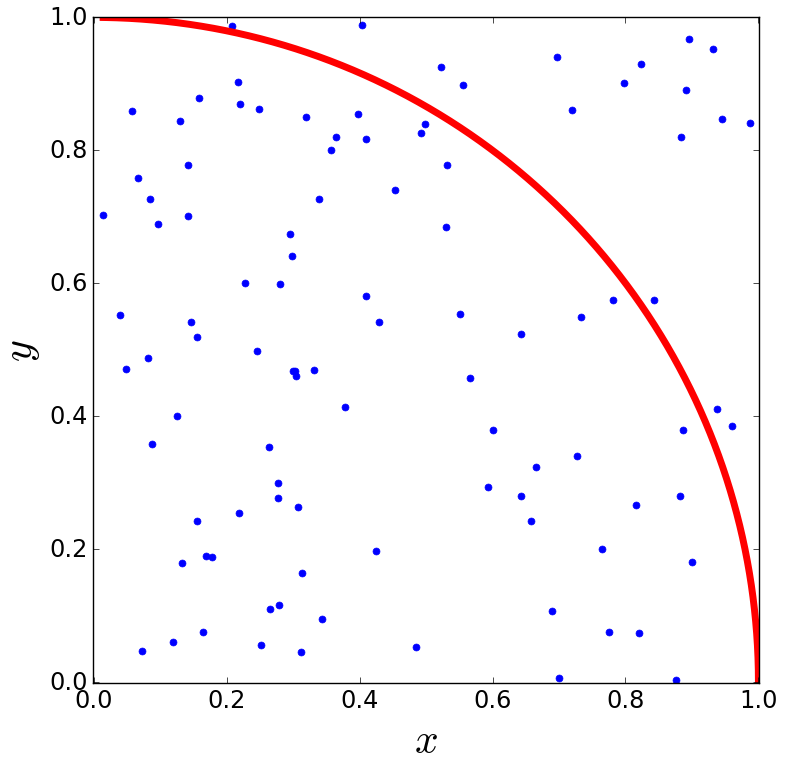
</div>

### Úkol 4: 
Odhadněte číslo $\pi$ pomocí metody Monte Carlo. Využijte k tomu integrál
\begin{equation*}
\int\limits_{0}^{1} \sqrt{1-x^2} \,\mathrm{d}x,
\end{equation*}
jehož odhad nám dá přibližnou hodnotu $\pi/4$.

In [ ]:
def monte_carlo(n):
    # n ... počet pokusů
    
    q = 0
    for i in range(n):
        x, y = np.random.rand(2) # generuje bod (x,y) ve čtverci <0,1) x <0,1)

        if x**2 + y**2 < 1:
            q += 1; # bod (x,y) leží v plošce ohraničené grafem funkce sqrt(1 - x^2), kladným směrem osy x a kladným směrem osy y
        
    S = 4 * q/n # přibližná hodnota integrálu vynásobená číslem 4
    err = np.abs(np.pi - S) # absolutní chyba výpočtu

    print("Hodnota integrálu krát 4 vypočtená přibližně pomocí metody Monte Carlo pro počet pokusů n =", n, "je S = " + str(S) + ".\nPři tomto odhadu jsme se dopustili chyby " + str(err) + ".\n")

In [ ]:
monte_carlo(100)

### 3.2. Náhodná procházka

Zůstaňme na u představy simulace pomocí házení kamínků do písku a představme si, že se chce do simulace zapojit i malé slabé dítě, které ještě nedohodí dost daleko. Pro jednoduchost uvažujme, že dítě může házet kamenem jen ve čtverci o délce strany $\delta <1$. Pokud bychom pokračovali podle předchozích pravidel, nebyly by pozice ve čtverci generovány zcela náhodně. Je tedy třeba nějak upravit algoritmus.

Jedna z možností je, že se první kámen hodí náhodně do jednotkového čtverce a poté se bude konstruovat náhodná procházka podle následujících pravidel:
<ul>
  <li>každý hod začíná v místě dopadu předchozího hodu,</li>
  <li>hází se náhodně ve čtverci o délce strany $\delta$, jehož střed je v místě, odkud se zrovna hází</li>
  <li>pokud by nějaký hod mířil ven z jednotkového čtverce, kamínek se položí na předchozí kámen a pokračuje se ze stejného místa (jinými slovy -- hod se započítá, ale pozice zůstane stejná).
</ul>

Tento způsob nám zaručí, že po čase budou kameny ve čtverci rozmístěny opravdu náhodně. Pak už můžeme opět pomocí poměru počtu kamínků pod grafem k celkovému počtu kamínků ve čtverci odhadnout hledaný obsah. Schéma náhodné procházky je na obrázku.

<div>
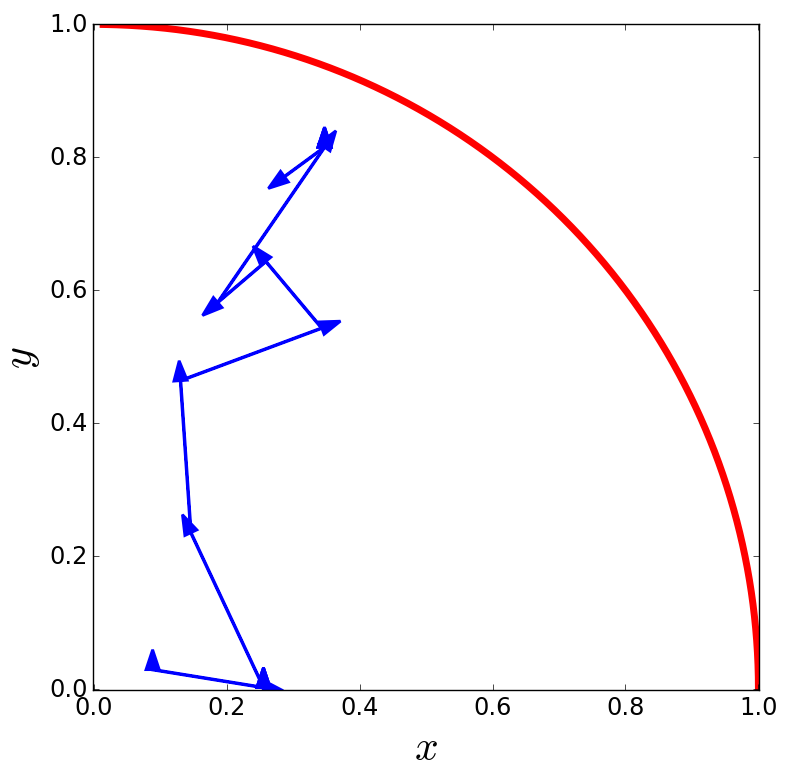
</div>

Tento způsob je mnohem složitější a méně přesný než předchozí, proto se využívá jen v případech, kdy není možné použít jiný přístup. Nejčastěji se využívá v případech, kdy nejsme schopni náhodně vybírat čísla s požadovanou hustotou pravděpodobnosti.

### Úkol 5: 
Odhadněte číslo $\pi$~pomocí metody Monte Carlo s generováním bodů pomocí náhodné procházky. Opět se nám bude hodit integrál
\begin{equation*}
\int\limits_{0}^{1} \sqrt{1-x^2} \,\mathrm{d}x,
\end{equation*}
jehož odhad nám dá přibližnou hodnotu $\pi/4$.

In [ ]:
def nahodna_prochazka(n, delta):
    # n ... počet pokusů
    # delta ... maximální délka hodu
    
    q = 0
    x, y = np.random.rand(2) # generuje bod ve čtverci <0,1) x <0,1)
    
    for i in range(n):
        dx, dy = np.multiply(2*delta, np.random.rand(2)) - delta # generuje bod (dx,dy) ve čtverci <-delta,delta) x <-delta,delta)
        
        n_x = x + dx 
        n_y = y + dy
        
        if n_x <= 1 and n_y <= 1 and n_x >= 0 and n_y >= 0: # hod míří do čtverce <0,1> x <0,1>    
            x = n_x 
            y = n_y
        
        if x**2 + y**2 < 1:
                q += 1 # bod (x,y) leží v plošce ohraničené grafem funkce sqrt(1 - x^2), kladným směrem osy x a kladným směrem osy y
        
    S = 4 * q/n # přibližná hodnota integrálu vynásobená číslem 4
    err = np.abs(np.pi - S) # absolutní chyba výpočtu
    
    print("Hodnota integrálu krát 4 vypočtená přibližně pomocí metody náhodné procházky pro počet pokusů n =", n, "je S = " + str(S) + ".\nPři tomto odhadu jsme se dopustili chyby " + str(err) + ".\n")

In [ ]:
nahodna_prochazka(100,0.25)

### 3.3. Crude Monte Carlo

Tato metoda je odvozena z definice určitého integrálu a využívá vzorec
\begin{equation}
\int\limits_{0}^{1} f(x)\,\mathrm{d}x = \lim_{n\to\infty} \frac{1}{n} \sum\limits_{i=1}^{n} f(x_{i}),
\end{equation}
kde body $x_{i}$, ve kterých se funkce vyčísluje, jsou generovány náhodně na intervalu $\langle 0,1\rangle$.

Na rozdíl od předchozích metod, které odhadovaly plochu pod grafem pomocí poměru bodů pod grafem k celkovému počtu bodů, tento přístup počítá odhad pomocí průměru funkčních hodnot v náhodných bodech. Nepotřebujeme tedy generovat body v rovině, ale pouze v jednom rozměru. Jak tato metoda funguje, můžete vidět na obrázku.


<div>
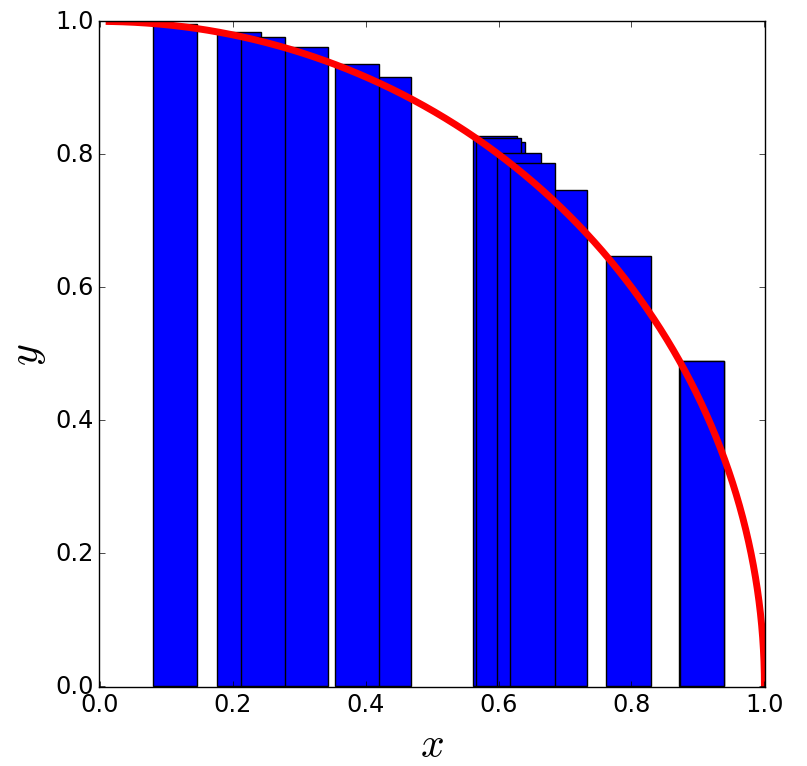
</div>


### Úkol 6: 
Odhadněte číslo $\pi$~pomocí metody Crude Monte Carlo. Využijeme integrál
\begin{equation*}
\int\limits_{0}^{1} \sqrt{1-x^2} \,\mathrm{d}x,
\end{equation*}
jehož odhad nám dá přibližnou hodnotu $\pi/4$.

In [ ]:
def crude_monte_carlo(n):
    # n ... počet pokusů
     
    q = np.zeros(n)
    
    for i in range(n):
        x = np.random.rand(1) # generuje x-ovou souřadnici bodu ve čtverci <0,1) 
        q[i] = np.sqrt(1 - x**2) # funkční hodnota funkce sqrt(1 - x^2)
               
    S = 4 * np.sum(q)/n # přibližná hodnota integrálu vynásobená číslem 4
    err = np.abs(np.pi - S) # absolutní chyba výpočtu

    print("Hodnota integrálu krát 4 vypočtená přibližně pomocí metody Crude Monte Carlo pro počet pokusů n =", n, "je S = " + str(S) + ".\nPři tomto odhadu jsme se dopustili chyby " + str(err) + ".\n")

In [ ]:
crude_monte_carlo(100)